In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from tensorflow.keras.datasets import cifar10

The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
* airplane : 0
* automobile : 1
* bird : 2
* cat : 3
* deer : 4
* dog : 5
* frog : 6
* horse : 7
* ship : 8
* truck : 9

In [29]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [30]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [31]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
X_train[0].shape

(32, 32, 3)

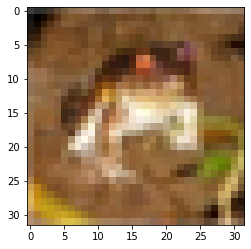

In [33]:
plt.imshow(X_train[0])

In [34]:
X_train[0].max()

255

In [35]:
X_train, X_test = X_train/255, X_test/255

In [36]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [37]:
from tensorflow.keras.utils import to_categorical

In [49]:
y_cat_train = to_categorical(y=y_train, num_classes=10)
y_cat_train.shape

(50000, 10)

In [50]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

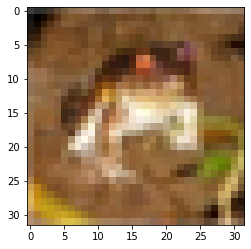

In [51]:
plt.imshow(X_train[0])

In [52]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [53]:
y_train[0]

array([6], dtype=uint8)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [59]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [65]:
model.fit(X_train, y_cat_train, epochs=15,
          validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 36s 22ms/step - loss: 1.7383 - accuracy: 0.3648 - val_loss: 1.3233 - val_accuracy: 0.5312
Epoch 2/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2352 - accuracy: 0.5627 - val_loss: 1.1262 - val_accuracy: 0.6056
Epoch 3/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0843 - accuracy: 0.6159 - val_loss: 1.0756 - val_accuracy: 0.6218
Epoch 4/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9546 - accuracy: 0.6640 - val_loss: 1.0621 - val_accuracy: 0.6327
Epoch 5/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8639 - accuracy: 0.6985 - val_loss: 0.9755 - val_accuracy: 0.6615
Epoch 6/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7843 - accuracy: 0.7275 - val_loss: 0.9974 - val_accuracy: 0.6646
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7006 - accuracy: 0.7544 - val_loss: 1.0395 -

<AxesSubplot:>

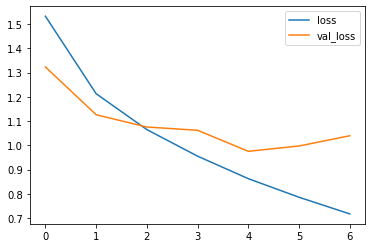

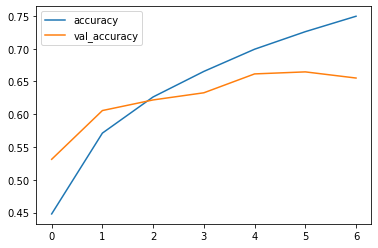

In [68]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()
metrics[['accuracy', 'val_accuracy']].plot()

In [69]:
model.evaluate(X_test, y_cat_test, verbose=0)

[1.0395355224609375, 0.6552000045776367]

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
predictions = model.predict_classes(X_test)
predictions.shape

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000,)

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.83      0.68      1000
           1       0.76      0.82      0.79      1000
           2       0.52      0.55      0.54      1000
           3       0.50      0.43      0.47      1000
           4       0.64      0.57      0.61      1000
           5       0.59      0.53      0.56      1000
           6       0.61      0.86      0.71      1000
           7       0.78      0.68      0.73      1000
           8       0.86      0.70      0.77      1000
           9       0.86      0.57      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000



<AxesSubplot:>

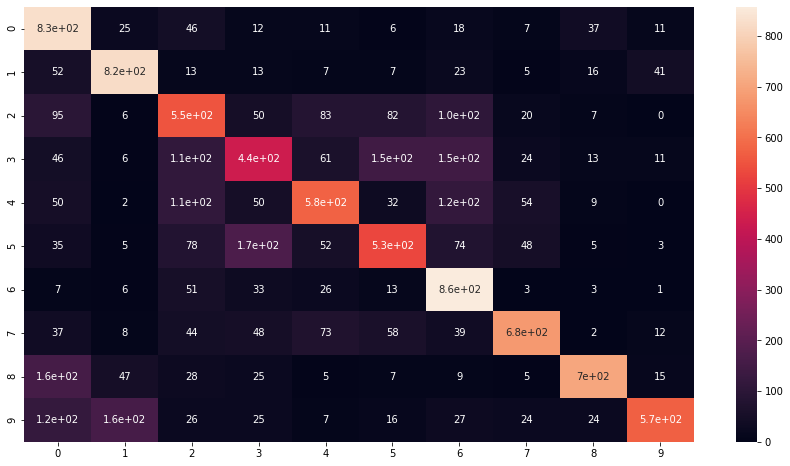

In [78]:
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)